# **1. Perkenalan Dataset**


Untuk proyek kali ini saya menggunakan dataset [Kaggle Stroke Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset). Dataset ini memiliki struktur:
- Terdapat 5110 baris data.
- Memiliki 12 kolom yang terdiri dari:_id_, _gender_, _age_, _hypertension_, _heart\_disease_, _ever\_married_, _work\_type_,	_Residence\_type_, _avg\_glucose\_level_, _bmi_, _smoking\_status_, dan _stroke_

| id    | gender | age  | hypertension | heart_disease | ever_married | work_type     | Residence_type | avg_glucose_level | bmi  | smoking_status  | stroke |
|-------|--------|------|--------------|---------------|--------------|---------------|----------------|-------------------|------|-----------------|--------|
| 9046  | Male   | 67.0 | 0            | 1             | Yes          | Private       | Urban          | 228.69            | 36.6 | formerly smoked | 1      |
| 51676 | Female | 61.0 | 0            | 0             | Yes          | Self-employed | Rural          | 202.21            | NaN  | never smoked    | 1      |
| 31112 | Male   | 80.0 | 0            | 1             | Yes          | Private       | Rural          | 105.92            | 32.5 | never smoked    | 1      |
| 60182 | Female | 49.0 | 0            | 0             | Yes          | Private       | Urban          | 171.23            | 34.4 | smokes          | 1      |
| 1665  | Female | 79.0 | 1            | 0             | Yes          | Self-employed | Rural          | 174.12            | 24.0 | never smoked    | 1      |

### Variabel-variabel pada Kaggle Stroke Prediction Dataset adalah sebagai berikut:
- **id**: kode unik setiap row.
- **gender**: jenis kelamin setiap sampel yang terbagi menjadi _Male_, _Female_, dan _Other_.
- **age**:  usia setiap sampel.
- **hypertension**: sampel yang pernah megalami hipertensi direpresentasikan dengan nilai '_1_' dan '_0_' jika belum pernah.
- **heart\_disease**: sama seperti kolom hypertension, sampel yang pernah megalami serangan jantung direpresentasikan dengan nilai '_1_' dan '_0_' jika belum pernah.
- **ever\_married**: status pernikahan setiap sampel.
- **work\_type**: merepresentasikan profesi sampel menurut kategori: '_Private_', '_Self-employed_', '_Govt\_job_', '_children_', '_Never\_worked_'.
- **Residence\_type**: tipe lingkungan tempat tinggal setiap sampel yang terjadi menjadi '_Urban_' dan '_Rural_'.
- **avg\_glucose\_level**: tingkat rata-rata gula darah setiap sampel.
- **bmi**: _Body Mass Index_ atau perbandingan berat dan tinggi badan setiap sampel.
- **smoking\_status**: status konsumsi rokok setiap sampel.
- dan **stroke**: merupakan label status sedang/ sudah pernah menderita _stroke_.
 

# **2. Import Library**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler


# **3. Memuat Dataset**

Memuat dataset raw ke dalam Pandas Dataframe.

In [2]:
df = pd.read_csv('../healthcare_stroke_dataset_raw.csv')
df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Menghapus kolom `id` karena tidak dibutuhkan.

In [4]:
df = df.drop(columns=['id'], axis=1)

Analisis sebaran data numerik dataset dengan `describe()`

In [5]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## **Mendeteksi Missing Value** 

Memeriksa keberadaan `null_value` dalam setiap _attribute_.   

In [6]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Memeriksa keberadaan nilai 0 atau `zero_values` pada _numerical attribute_ yang tidak mungkin bernilai 0, yaitu _avg\_glucose\_level_ (rata-rata kadar gula darah) dan _bmi_ (Indeks Massa Tubuh)

In [7]:
print('Zero values')
print('Average Glucose Level : ', len(df[df['avg_glucose_level'] == 0]))
print('BMI : ', len(df[df['bmi'] == 0]))

Zero values
Average Glucose Level :  0
BMI :  0


## **Univariate Analysis**

Menganalisis sebaran data dari masing-masing _attribute_.

<Axes: xlabel='gender', ylabel='count'>

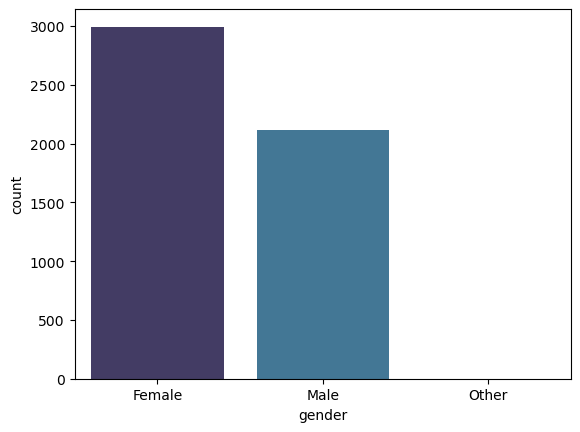

In [8]:
gender = df['gender'].value_counts()
sns.barplot(x=gender.index, y=gender, hue=gender.index, palette='mako')

<Axes: xlabel='hypertension', ylabel='count'>

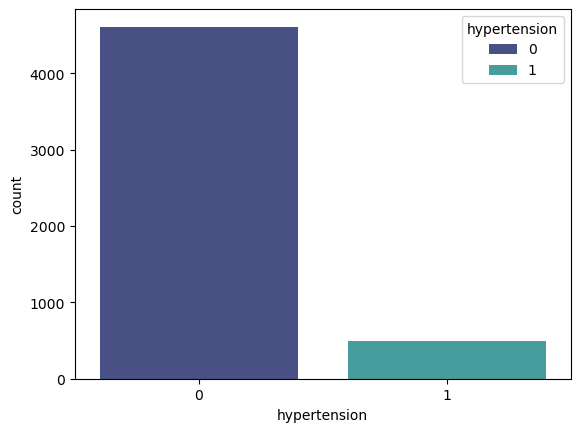

In [9]:
hypertension = df['hypertension'].value_counts()
sns.barplot(x=hypertension.index, y=hypertension, hue=hypertension.index, palette='mako')

<Axes: xlabel='work_type', ylabel='count'>

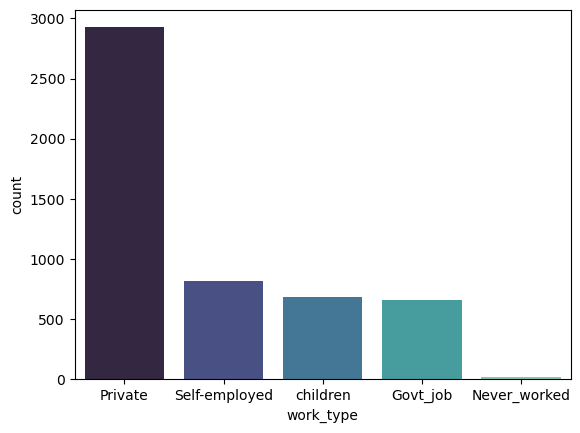

In [10]:
work = df['work_type'].value_counts()
sns.barplot(x=work.index, y=work, hue=work.index, palette='mako')

<Axes: xlabel='Residence_type', ylabel='count'>

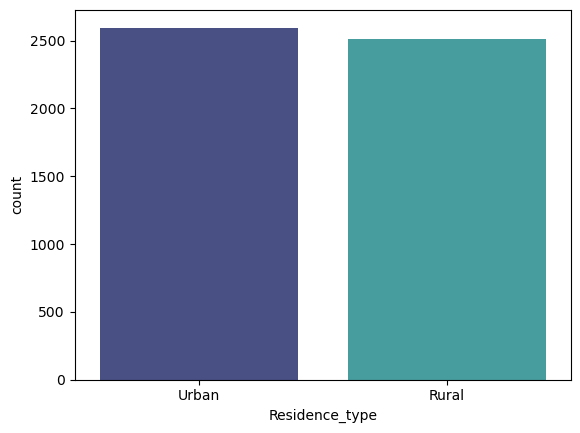

In [11]:
residence = df['Residence_type'].value_counts()
sns.barplot(x=residence.index, y=residence, hue=residence.index, palette='mako')

<Axes: xlabel='smoking_status', ylabel='count'>

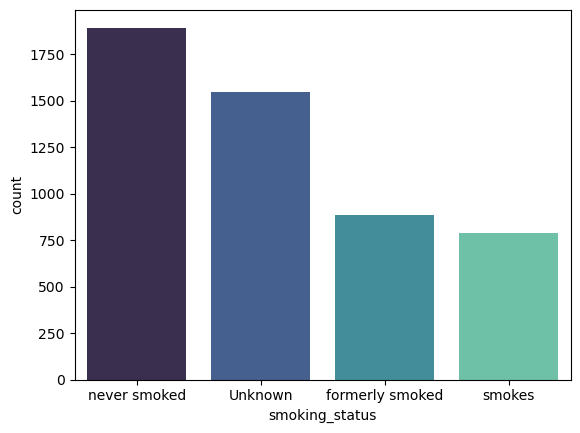

In [12]:
smoking = df['smoking_status'].value_counts()
sns.barplot(x=smoking.index, y=smoking, hue=smoking.index, palette='mako')

<Axes: xlabel='stroke', ylabel='count'>

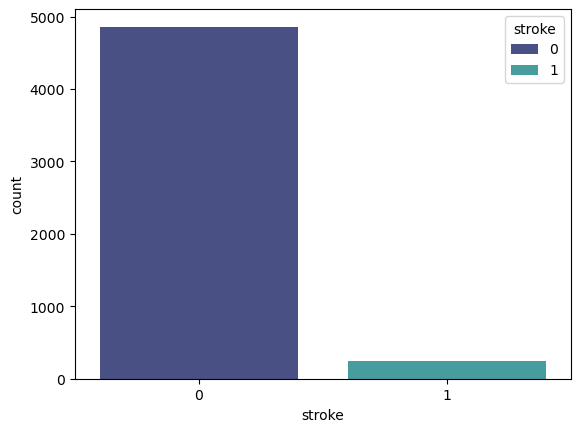

In [13]:
stroke = df['stroke'].value_counts()
sns.barplot(x=stroke.index, y=stroke, hue=stroke.index, palette='mako')

Analisis `numerical_attribute` dengan _histogram_.

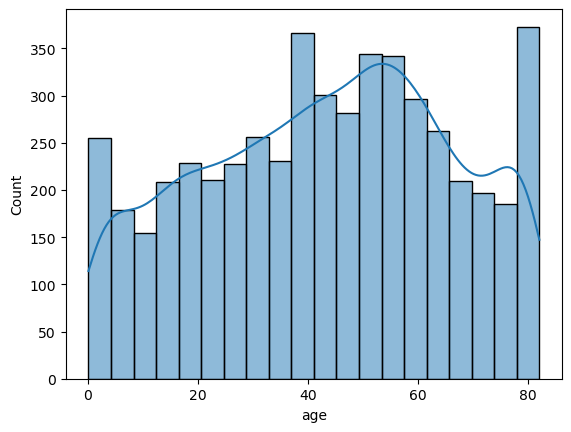

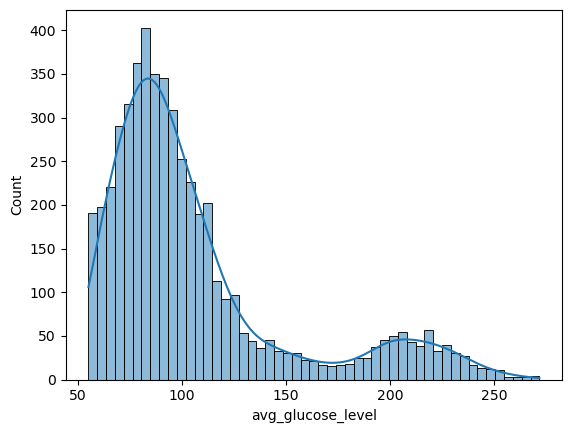

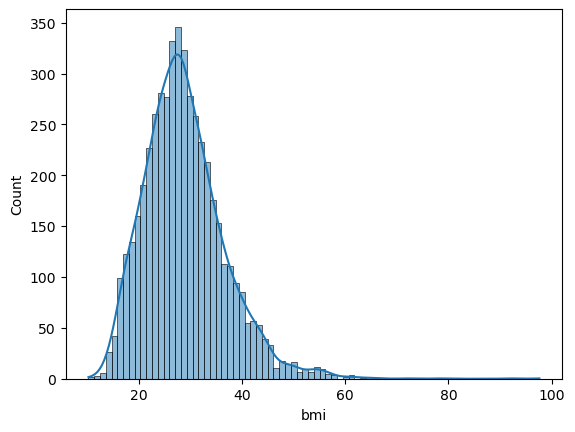

In [14]:
sns.histplot(df['age'], kde=True)
plt.show()

sns.histplot(df['avg_glucose_level'], kde=True)
plt.show()

sns.histplot(df['bmi'], kde=True)
plt.show()

## **Multivariate Analysis**

<Axes: xlabel='age', ylabel='avg_glucose_level'>

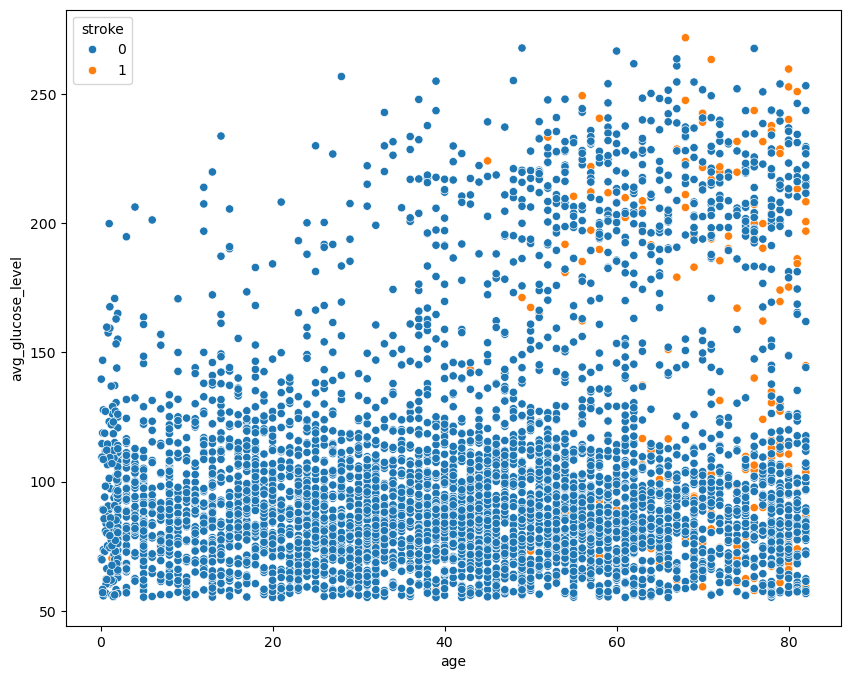

In [15]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='age', y='avg_glucose_level', data=df, hue='stroke')

<Axes: xlabel='age', ylabel='bmi'>

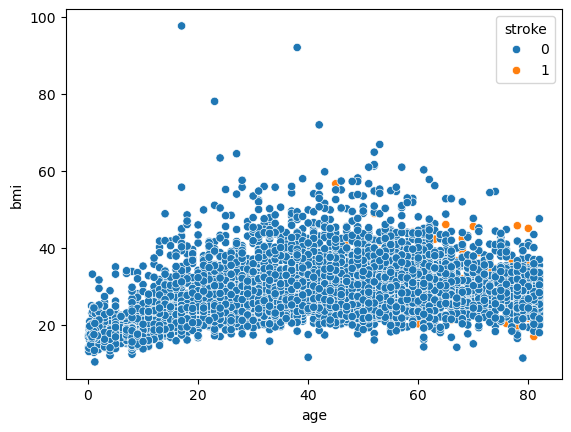

In [16]:
sns.scatterplot(x='age', y='bmi', data=df, hue='stroke')

<Axes: >

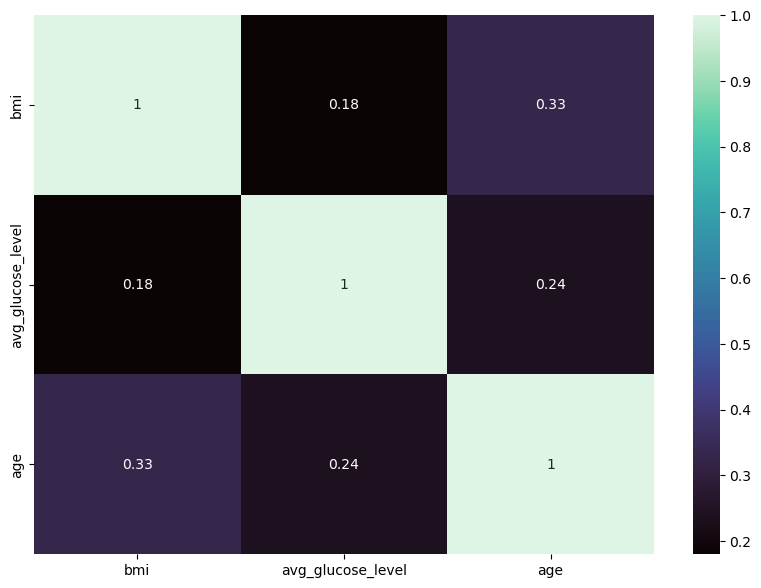

In [17]:
correlation_matrix = df[['bmi','avg_glucose_level', 'age']].corr().round(2)

plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True,cmap='mako')

# **5. Data Preprocessing**

Meghapus data sampel dengan kategori gender _Other_ karena hanya memiliki satu sampel. Ini dilakukan karena sampel bisa dianggap tidak penting dan dapat mengganggu proses _model training_.

In [18]:
print('Other gender sample count: ', len(df[df['gender']=='Other']))
df = df[df['gender'] != 'Other']

Other gender sample count:  1


## Menangani `missing_value`

Mengganti missing value pada kolom `bmi` dengan median.

In [19]:
bmi_median = df['bmi'].median()
print("Median BMI: ", bmi_median)

Median BMI:  28.1


In [20]:
df['bmi'] = df['bmi'].fillna(bmi_median)
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## Encoding

In [21]:
gender_mapping = {'Male': 1, 'Female': 0}
ever_married_mapping = {'Yes': 1, 'No': 0}
residence_type_mapping = {'Urban': 1, 'Rural': 0}

df['gender'] = df['gender'].map(gender_mapping)
df['ever_married'] = df['ever_married'].map(ever_married_mapping)
df['Residence_type'] = df['Residence_type'].map(residence_type_mapping)

In [22]:
df = pd.concat([df, pd.get_dummies(df['work_type'], dtype=int)], axis=1)
df = pd.concat([df, pd.get_dummies(df['smoking_status'], dtype=int)], axis=1)
df = df.drop(columns=['work_type', 'smoking_status'], axis=1)

df.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,Govt_job,Never_worked,Private,Self-employed,children,Unknown,formerly smoked,never smoked,smokes
0,1,67.0,0,1,1,1,228.69,36.6,1,0,0,1,0,0,0,1,0,0
1,0,61.0,0,0,1,0,202.21,28.1,1,0,0,0,1,0,0,0,1,0
2,1,80.0,0,1,1,0,105.92,32.5,1,0,0,1,0,0,0,0,1,0
3,0,49.0,0,0,1,1,171.23,34.4,1,0,0,1,0,0,0,0,0,1
4,0,79.0,1,0,1,0,174.12,24.0,1,0,0,0,1,0,0,0,1,0


## Resampling

Menyeimbangkan sample dengan metode `over sampling` data karena jumlah sample stroke dan tidak stroke sangat timpang.

<Axes: xlabel='stroke', ylabel='count'>

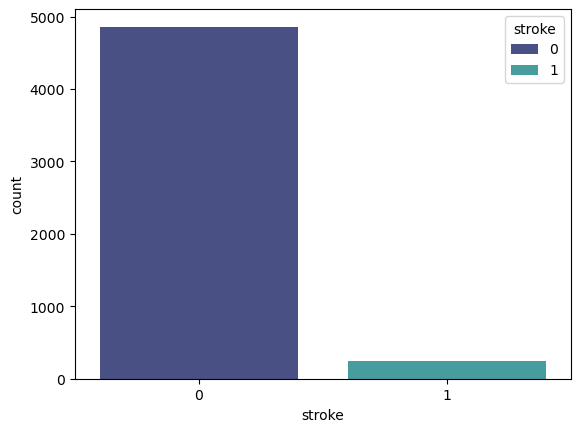

In [23]:
X = df.drop(columns='stroke', axis=1)
y = df['stroke']

before_sample = y.value_counts()
sns.barplot(x=before_sample.index, y=before_sample,hue=before_sample.index, palette='mako')

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


<Axes: xlabel='stroke', ylabel='count'>

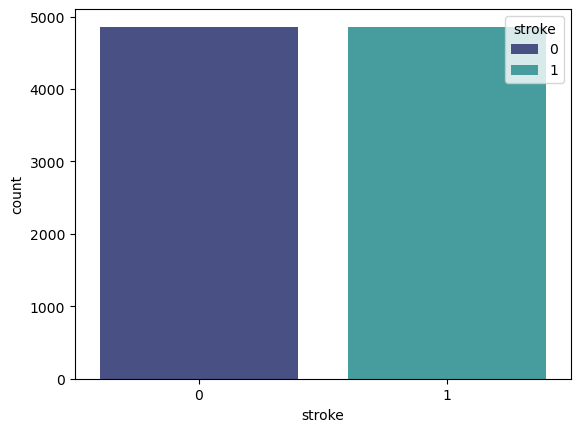

In [24]:
sampler = RandomOverSampler(sampling_strategy='minority', random_state=252)

X_res, y_res = sampler.fit_resample(X, y)

after_sample = y_res.value_counts()
sns.barplot(x=after_sample.index, y=after_sample, hue=after_sample.index, palette='mako')

## Export Data Preprocessing

Menggabungkan kembali data yang telah di-_resample_.

In [25]:
df_preprocess = pd.concat([X_res, y_res], axis=1)
df_preprocess


,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,Govt_job,Never_worked,Private,Self-employed,children,Unknown,formerly smoked,never smoked,smokes,stroke
0,1,67.0,0,1,1,1,228.69,36.6,0,0,1,0,0,0,1,0,0,1
1,0,61.0,0,0,1,0,202.21,28.1,0,0,0,1,0,0,0,1,0,1
2,1,80.0,0,1,1,0,105.92,32.5,0,0,1,0,0,0,0,1,0,1
3,0,49.0,0,0,1,1,171.23,34.4,0,0,1,0,0,0,0,0,1,1
4,0,79.0,1,0,1,0,174.12,24.0,0,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9715,0,56.0,0,0,1,0,162.23,27.3,1,0,0,0,0,1,0,0,0,1
9716,0,50.0,1,0,1,0,167.41,30.9,0,0,0,1,0,0,0,1,0,1
9717,0,68.0,1,0,0,1,79.79,29.7,0,0,0,1,0,0,0,1,0,1
9718,0,51.0,0,0,1,1,165.31,28.1,0,0,1,0,0,0,0,1,0,1


Export ke file `csv`.

In [26]:
df_preprocess.to_csv('healthcare_stroke_dataset_preprocessing.csv', index=False)